# Assignment 6: Constraint Propagation in solving CSPs

## CSPs OVERVIEW

**CSPs** are a special kind of search problems. Here we don't treat the space as a black box but the state has a particular form and we use that to our advantage to tweak our algorithms to be more suited to the problems.

A *CSP State* is defined by a set of variables which can take values from corresponding domains. These variables can take only certain values in their *domains* to satisfy the *constraints*.

A set of assignments which satisfies all constraints passes the goal test.

   A CSP is specified by the following *inputs*:
  * *variables*   A list of variables; each is atomic (e.g. int or string).
  * *domains*     A dict of {var:[possible_value, ...]} entries.
  * *neighbors*   A dict of {var:[var,...]} that for each variable lists the other variables that participate in constraints.
  * *constraints* A function f(A, a, B, b) that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b

*CSP* class is a derived class from the base *Problem* class

`class CSP (Problem)`

A CSP class consists of all is CSP's inputs mentioned above.

The `__ _ init _ __` method parameters specify the CSP.

`Variables` can be passed as a list of strings or integers.

`Domains` are passed as dict where "key" specifies the variables and "value" specifies the domains.

The variables are passed as an empty list. Variables are extracted from the keys of the domain dictionary.

`Neighbor` is a dict of variables that essentially describes the constraint graph. Here each variable key has a list of its values which are the variables that are constraint along with it.

The `constraint` parameter should be a function f(A, a, B, b) that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b.

We have additional parameters like `nassings` which is incremented each time an assignment is made when calling the `assign` method.


The CSP class also supports data structures and methods that help you solve CSPs by calling a search function on the CSP.

Methods and slots are as follows, where the argument 'a' represents an assignment, which is a dict of *{var:val}* entries

In [31]:
from CSPclass import *
help(CSPBasic)

Help on class CSPBasic in module CSPclass:

class CSPBasic(problemClass.Problem)
 |  CSPBasic(variables, domains, neighbors, constraints)
 |  
 |  Method resolution order:
 |      CSPBasic
 |      problemClass.Problem
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, variables, domains, neighbors, constraints)
 |      Construct a CSP problem. If variables is empty, it becomes domains.keys().
 |  
 |  prune(self, var, value)
 |      Rule out var=value.
 |  
 |  support_pruning(self)
 |      Make sure we can prune values from domains. 
 |      (We want to pay for this only if we use it.)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from problemClass.Problem:
 |  
 |  actions(self, state)
 |      Return the actions that can be executed in the given
 |      state. 
 |      This Problem class only deals with deterministic outcomes. 
 |      So we know for sure what every action in a state would result to
 

In [32]:
help(CSPBasic.prune)

Help on function prune in module CSPclass:

prune(self, var, value)
    Rule out var=value.



Implement the CSP model to solve the Asterisk Sudoku, as described below.

## Australia map-coloring problem

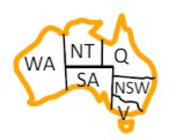

The idea of **map coloring problem** is that *the adjacent nodes (those connected by edges) should not have the same color throughout the graph*.

The graph can be colored using a fixed number of colors.

Here *each node is a variable* and the values are the colors that can be assigned to them.

Given that the domain will be the same for all our nodes we use a custom dict defined by the `UniversalDict` class.

The `UniversalDict Class` takes in a parameter and returns it as a value for all the keys of the dict.

It does not support item assignment.

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A6/src' #@param {type: "string"}
sys.path.append(path)

In [7]:
from utils import UniversalDict

In [8]:
australiaColors=UniversalDict(list('RGB'))

In [9]:
print(australiaColors['SA'],australiaColors['NT'])

['R', 'G', 'B'] ['R', 'G', 'B']


Our `CSP Class` includes the *constraint parameter* which should be a function *f(A, a, B, b)*

So, we need to define a constraint function f(A, a, B, b).

In this case , we need to ensure that the neighbors don't have the same color.

This is defined in the function `different_values_constraint` of the module `Utils.py.`

In [10]:
from utils import different_values_constraint
help(different_values_constraint)

Help on function different_values_constraint in module utils:

different_values_constraint(A, a, B, b)
    A constraint saying two neighboring variables must differ in value.



The CSP class takes neighbors in the form of a Dictionary.

`{'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}`

A simple helper function `parse_neighbors` allows us to take *input in the form of strings* and return a Dict of a form that is compatible with the CSP Class.

In [11]:
from utils import parse_neighbors
help(parse_neighbors)

Help on function parse_neighbors in module utils:

parse_neighbors(neighbors)
    Convert a string of the form 'X: Y Z; Y: Z' into a dict mapping
    regions to neighbors. The syntax is a region name followed by a ':'
    followed by zero or more region names, followed by ';', repeated for
    each region name. If you say 'X: Y' you don't need 'Y: X'.
    >>> parse_neighbors('X: Y Z; Y: Z') == {'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}
    True



In [12]:
australia="SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: "

In [13]:
parse_neighbors(australia)

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

The `MapColoringCSP` function creates and returns a CSP with the above constraint function and states.

The variables are the keys of the *neighbors* dict and the constraint is the one specified by the *different_values_constratint* function.

In [33]:
from utils import MapColoringCSP
help(MapColoringCSP)


Help on function MapColoringCSP in module utils:

MapColoringCSP(colors, neighbors)
    Make a CSP for the problem of coloring a map with different colors
    for any two adjacent regions. Arguments are a list of colors, and a
    dict of {region: [neighbor,...]} entries. This dict may also be
    specified as a string of the form defined by parse_neighbors.



In [34]:
australiaCSP = MapColoringCSP(list('RGB'), australia)

In [35]:
australiaCSP.variables

['SA', 'WA', 'NT', 'Q', 'NSW', 'V']

In [36]:
australiaCSP.domains

Any from ['R', 'G', 'B']

In [37]:
australiaCSP.neighbors

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

In [38]:
from queue import Queue
q = Queue()

for Xi in australiaCSP.variables:
  for Xk in australiaCSP.neighbors[Xi]:
    q.put((Xi, Xk))

(Xi, Xj) = q.get()
print((Xi, Xj))

for x in australiaCSP.domains[Xi]:
  for y in australiaCSP.domains[Xj]:
    if not australiaCSP.constraints(Xi, x, Xj, y):
      print(f'{x} value for var. {Xi} conflicts with {y} value for var. {Xj} ')




('SA', 'WA')
R value for var. SA conflicts with R value for var. WA 
G value for var. SA conflicts with G value for var. WA 
B value for var. SA conflicts with B value for var. WA 


## AC-3

Algorithms that solve CSPs have a choice between searching and or doing a **constraint propagation**, a specific type of inference.

The constraints can be used to reduce the number of legal values for another variable, which in turn can reduce the legal values for some other variable, and so on.
*Constraint propagation* tries to enforce local consistency. Consider each variable as a node in a graph and each binary constraint as an arc.

Enforcing *local consistency* causes inconsistent values to be eliminated throughout the graph

**AC-3** is an algorithm that enforces *arc consistency*. After applying AC-3, either every arc is arc-consistent, or some variable has an empty domain, indicating that the CSP cannot be solved.

A variable Xi is arc-consistent with respect to another variable Xj if for every value in the current domain Di there is some value in the domain Dj that satisfies the binary constraint on the arc (Xi,Xj).

A graph is arc-consistent if every variable is arc-consistent with every other variable.

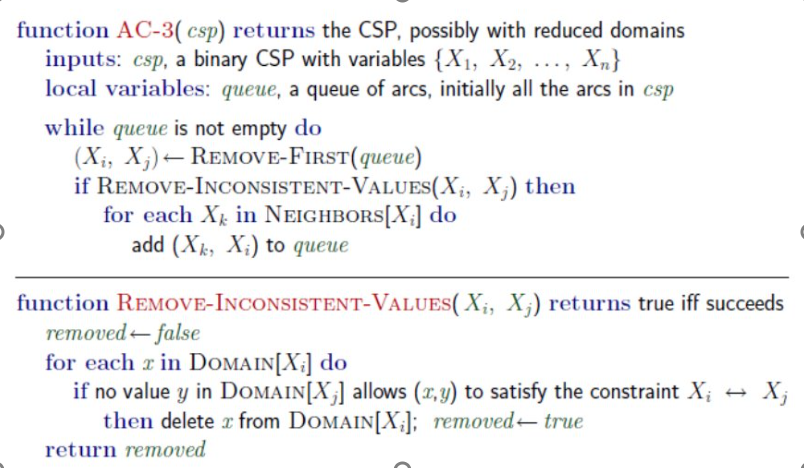

Let's see how AC3 can be used.

In [39]:
neighbors = parse_neighbors('A: B; B: ')
domains = {'A': [3,4,5,6,7], 'B': [1, 2, 3, 4,5]}
constraints = lambda X, x, Y, y: x==y

In [41]:
neighbors

defaultdict(list, {'A': ['B'], 'B': ['A']})

In [42]:
simpleCSP=CSPBasic(variables=None,neighbors=neighbors, domains=domains, constraints=constraints)

In [43]:
from algorithms import AC3

AC3(simpleCSP)

Initial queue:
('A', 'B') 
('B', 'A') 
Arc ('A', 'B') is cheking
The val 6 was deleted from A domain
The val 7 was deleted from A domain
[('B', 'A')]
Arc ('B', 'A') is cheking
The val 1 was deleted from B domain
The val 2 was deleted from B domain
[]


(True, 34)

In [44]:
simpleCSP.domains

{'A': [3, 4, 5, 6, 7], 'B': [1, 2, 3, 4, 5]}

In [45]:
simpleCSP.curr_domains['A']

[3, 4, 5]

In [46]:
simpleCSP.curr_domains['B']

[3, 4, 5]

In [47]:
neighbors1 = parse_neighbors('X: Y; Y: Z')
domains1 = {'X': [4,5,6,7], 'Y': [4,5,6,8,9], 'Z':[3,5,6,7,9]}
constraints1 = lambda X, x, Y, y: x==y

In [48]:
simpleCSP1=CSPBasic(variables=None,neighbors=neighbors1, domains=domains1, constraints=constraints1)

In [49]:
from algorithms import AC3
AC3(simpleCSP1)

Initial queue:
('X', 'Y') 
('Y', 'X') ('Y', 'Z') 
('Z', 'Y') 
Arc ('X', 'Y') is cheking
The val 7 was deleted from X domain
[('Y', 'X'), ('Y', 'Z'), ('Z', 'Y')]
Arc ('Y', 'X') is cheking
The val 8 was deleted from Y domain
The val 9 was deleted from Y domain
[('Y', 'Z'), ('Z', 'Y'), ('Z', 'Y')]
Arc ('Y', 'Z') is cheking
The val 4 was deleted from Y domain
[('Z', 'Y'), ('Z', 'Y'), ('X', 'Y')]
Arc ('Z', 'Y') is cheking
The val 3 was deleted from Z domain
The val 7 was deleted from Z domain
The val 9 was deleted from Z domain
[('Z', 'Y'), ('X', 'Y')]
Arc ('Z', 'Y') is cheking
[('X', 'Y')]
Arc ('X', 'Y') is cheking
The val 4 was deleted from X domain
[]


(True, 50)

In [50]:
for var in simpleCSP1.variables:
    print(var, simpleCSP1.curr_domains[var])

X [5, 6]
Y [5, 6]
Z [5, 6]


## **Task 1 -10 points**

Imagine that you need to create an exam schedule for the following courses:
1. Algorithms I
2. Introduction to File and Database Management
3. Practical Programming Methodology
4. Computer Organization and Architecture I
5. Linear Algebra I
6. Introduction to Applied Statistics I
7. Operating Systems

*Hint*: in the constraint satisfaction graph each node represents a course


Each course is associated with an initial domain of possible exam days:
1. Algorithms I *{Mon, Tue, Wed}*
2. Introduction to File and Database Management *{Tue}*
3. Practical Programming Methodology *{Mon, Tue, Wed}*
4. Computer Organization and Architecture I *{Mon, Tue, Wed}*
5. Linear Algebra I *{Mon, Tue, Wed}*
6. Introduction to Applied Statistics I *{Wed}*
7. Operating Systems *{Mon, Tue, Wed}*

Main restriction: 2 courses must have exams on different days.

1. Develop CSP implementation for this problem (based on CSP class) - *5 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for Practical Programming Methodology, Computer Organization and Architecture I, Linear Algebra I  - *5 points*

## **Task 2 - 10 points**

Modify (enhance) the given code version to make AC-3 applicable for such constraints as the following examples:

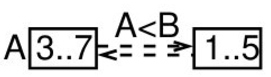

 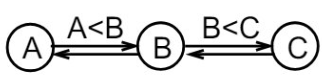

## Simple Sudoku Example

In [59]:
var1=list("ABC")
var2=range(1,4)

vars=set()

for letter in var1:
    for number in var2:
      vars.add(letter+str(number))

vars

{'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'}

In [60]:
sudokuNeighbors={}

for letter in var1:
    for number in var2:
      sudokuNeighbors[letter+str(number)]=[]

sudokuNeighbors


{'A1': [],
 'A2': [],
 'A3': [],
 'B1': [],
 'B2': [],
 'B3': [],
 'C1': [],
 'C2': [],
 'C3': []}

In [61]:
for key1 in sudokuNeighbors.keys():
  for key2 in sudokuNeighbors.keys():
    if key1!=key2:
      sudokuNeighbors[key1].append(key2)

sudokuNeighbors


{'A1': ['A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'A2': ['A1', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'A3': ['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'B1': ['A1', 'A2', 'A3', 'B2', 'B3', 'C1', 'C2', 'C3'],
 'B2': ['A1', 'A2', 'A3', 'B1', 'B3', 'C1', 'C2', 'C3'],
 'B3': ['A1', 'A2', 'A3', 'B1', 'B2', 'C1', 'C2', 'C3'],
 'C1': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C2', 'C3'],
 'C2': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C3'],
 'C3': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2']}

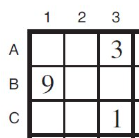

In [74]:
filled={'A3':3, 'B1':9,'C3':1}

In [75]:
sudokuDomains={var:[filled[var]] if var in filled else [ch for ch in range(1,10)] for var in sudokuNeighbors.keys()}
sudokuDomains

{'A1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A3': [3],
 'B1': [9],
 'B2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B3': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C3': [1]}

In [76]:
sudokuConstraints1 = lambda X, x, Y, y: x!=y

In [77]:
basicSudokuCSP=CSPBasic(variables=sudokuNeighbors.keys(),neighbors=sudokuNeighbors, domains=sudokuDomains, constraints=sudokuConstraints1)

In [78]:
from algorithms import AC3
AC3(basicSudokuCSP)

Initial queue:
('A1', 'A2') ('A1', 'A3') ('A1', 'B1') ('A1', 'B2') ('A1', 'B3') ('A1', 'C1') ('A1', 'C2') ('A1', 'C3') 
('A2', 'A1') ('A2', 'A3') ('A2', 'B1') ('A2', 'B2') ('A2', 'B3') ('A2', 'C1') ('A2', 'C2') ('A2', 'C3') 
('A3', 'A1') ('A3', 'A2') ('A3', 'B1') ('A3', 'B2') ('A3', 'B3') ('A3', 'C1') ('A3', 'C2') ('A3', 'C3') 
('B1', 'A1') ('B1', 'A2') ('B1', 'A3') ('B1', 'B2') ('B1', 'B3') ('B1', 'C1') ('B1', 'C2') ('B1', 'C3') 
('B2', 'A1') ('B2', 'A2') ('B2', 'A3') ('B2', 'B1') ('B2', 'B3') ('B2', 'C1') ('B2', 'C2') ('B2', 'C3') 
('B3', 'A1') ('B3', 'A2') ('B3', 'A3') ('B3', 'B1') ('B3', 'B2') ('B3', 'C1') ('B3', 'C2') ('B3', 'C3') 
('C1', 'A1') ('C1', 'A2') ('C1', 'A3') ('C1', 'B1') ('C1', 'B2') ('C1', 'B3') ('C1', 'C2') ('C1', 'C3') 
('C2', 'A1') ('C2', 'A2') ('C2', 'A3') ('C2', 'B1') ('C2', 'B2') ('C2', 'B3') ('C2', 'C1') ('C2', 'C3') 
('C3', 'A1') ('C3', 'A2') ('C3', 'A3') ('C3', 'B1') ('C3', 'B2') ('C3', 'B3') ('C3', 'C1') ('C3', 'C2') 
Arc ('A1', 'A2') is cheking
[('A1', 'A3'

(True, 1094)

[('C1', 'C2')]
Arc ('C1', 'C2') is cheking
[]


In [79]:
for var in basicSudokuCSP.variables:
    print(var, basicSudokuCSP.curr_domains[var])

A1 [2, 4, 5, 6, 7, 8]
A2 [2, 4, 5, 6, 7, 8]
A3 [3]
B1 [9]
B2 [2, 4, 5, 6, 7, 8]
B3 [2, 4, 5, 6, 7, 8]
C1 [2, 4, 5, 6, 7, 8]
C2 [2, 4, 5, 6, 7, 8]
C3 [1]


## **Task 3 - 20 points**

### About Asterisk Sudoku

Asterisk Sudoku is a variant of the classic Sudoku, a number placement puzzle traditionally presented in a 9x9 grid, subdivided into 3x3 subgrids or "regions." (aka "house")

The grid partially fills with numbers, referred to as "givens."  - the start state of the puzzle.

The objective is to populate the empty cells in such a way that each number 1 through 9 appears exactly once in each row, column, and region.

In the Asterisk Sudoku variant, an additional constraint is introduced with a specially shaded area, an "asterisk," which must also contain the numbers 1 through 9 without repetition.

 An example of an Asterisk grid in its initial state (left) and solution (right).

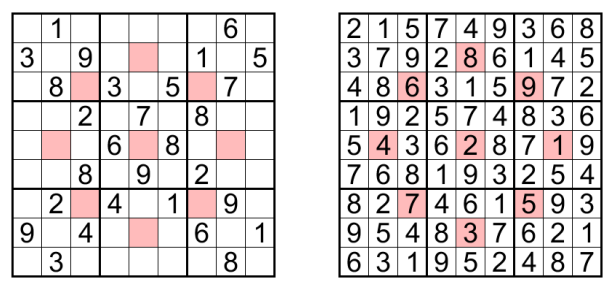

• **A puzzle is solved if**:Every space on the board is given one value between 1 and 9 inclusive.


### Tasks:

1. Develop CSP implementation for Asterisk Sudoku problem (based on CSP class) - *15 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for all cells - *5 points*

## Our ex. of *coloring the map of Australia*

In [ ]:
australiaCSP.neighbors

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

In [ ]:
AC3(australiaCSP)

Initial queue:
('SA', 'WA') ('SA', 'NT') ('SA', 'Q') ('SA', 'NSW') ('SA', 'V') 
('WA', 'SA') ('WA', 'NT') 
('NT', 'SA') ('NT', 'WA') ('NT', 'Q') 
('Q', 'SA') ('Q', 'NT') ('Q', 'NSW') 
('NSW', 'SA') ('NSW', 'Q') ('NSW', 'V') 
('V', 'SA') ('V', 'NSW') 
Arc ('SA', 'WA') is cheking
[('SA', 'NT'), ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('WA', 'SA'), ('WA', 'NT'), ('NT', 'SA'), ('NT', 'WA'), ('NT', 'Q'), ('Q', 'SA'), ('Q', 'NT'), ('Q', 'NSW'), ('NSW', 'SA'), ('NSW', 'Q'), ('NSW', 'V'), ('V', 'SA'), ('V', 'NSW')]
Arc ('SA', 'NT') is cheking
[('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('WA', 'SA'), ('WA', 'NT'), ('NT', 'SA'), ('NT', 'WA'), ('NT', 'Q'), ('Q', 'SA'), ('Q', 'NT'), ('Q', 'NSW'), ('NSW', 'SA'), ('NSW', 'Q'), ('NSW', 'V'), ('V', 'SA'), ('V', 'NSW')]
Arc ('SA', 'Q') is cheking
[('SA', 'NSW'), ('SA', 'V'), ('WA', 'SA'), ('WA', 'NT'), ('NT', 'SA'), ('NT', 'WA'), ('NT', 'Q'), ('Q', 'SA'), ('Q', 'NT'), ('Q', 'NSW'), ('NSW', 'SA'), ('NSW', 'Q'), ('NSW', 'V'), ('V', 'SA'), ('V', 'NSW')]
Ar

(True, 72)

In [ ]:
for var in australiaCSP.variables:
    print(var, australiaCSP.curr_domains[var])

SA ['R', 'G', 'B']
WA ['R', 'G', 'B']
NT ['R', 'G', 'B']
Q ['R', 'G', 'B']
NSW ['R', 'G', 'B']
V ['R', 'G', 'B']
